# Importing Dataset and counting number of languages

In [3]:
import pandas as pd
df=pd.read_csv("D:\ml\Language Detection\dataset.csv")

In [4]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

# Cleaning Text

In [5]:
pun='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punc(text):
    cleaned="".join([i for i in text if i not in pun])
    return cleaned

In [7]:
df['Text_cleaned']=df['Text'].apply(lambda x:remove_punc(x))
df['Text_cleaned']=df['Text_cleaned'].apply(lambda x:x.lower())

In [8]:
df

,Text,language,Text_cleaned
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuit...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
...,...,...,...
21995,hors du terrain les années et sont des année...,French,hors du terrain les années et sont des année...
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997,con motivo de la celebración del septuagésimoq...,Spanish,con motivo de la celebración del septuagésimoq...
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,年月，當時還只有歲的她在美國出道，以maik名義推出首張英文《baby i like》，由美...


# Train Test split

In [9]:
X=df['Text_cleaned']
Y=df['language']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# ML pipeline for tokenizing text and training with model

In [12]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('NB',MultinomialNB())
])


In [13]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('NB', MultinomialNB())])

# Checking accuracy

In [14]:
from sklearn.metrics import classification_report
Y_pred=clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       254
     Chinese       0.98      0.52      0.68       262
       Dutch       0.98      0.99      0.99       234
     English       0.69      1.00      0.81       273
    Estonian       0.98      0.98      0.98       243
      French       0.97      0.99      0.98       238
       Hindi       1.00      0.99      0.99       232
  Indonesian       0.98      0.98      0.98       248
    Japanese       0.99      0.58      0.73       247
      Korean       1.00      0.99      0.99       238
       Latin       0.99      0.91      0.95       267
     Persian       1.00      1.00      1.00       246
   Portugese       0.99      0.93      0.96       251
      Pushto       0.99      0.96      0.98       267
    Romanian       0.99      0.98      0.99       251
     Russian       0.99      0.98      0.98       261
     Spanish       0.96      0.99      0.97       242
     Swedish       0.60    

In [15]:
Y_pred[:4]

array(['Hindi', 'Arabic', 'Latin', 'Urdu'], dtype='<U10')

In [16]:
Y_test[:4]

9412      Hindi
3604     Arabic
21619     Latin
5155       Urdu
Name: language, dtype: object

In [17]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,Y_pred)

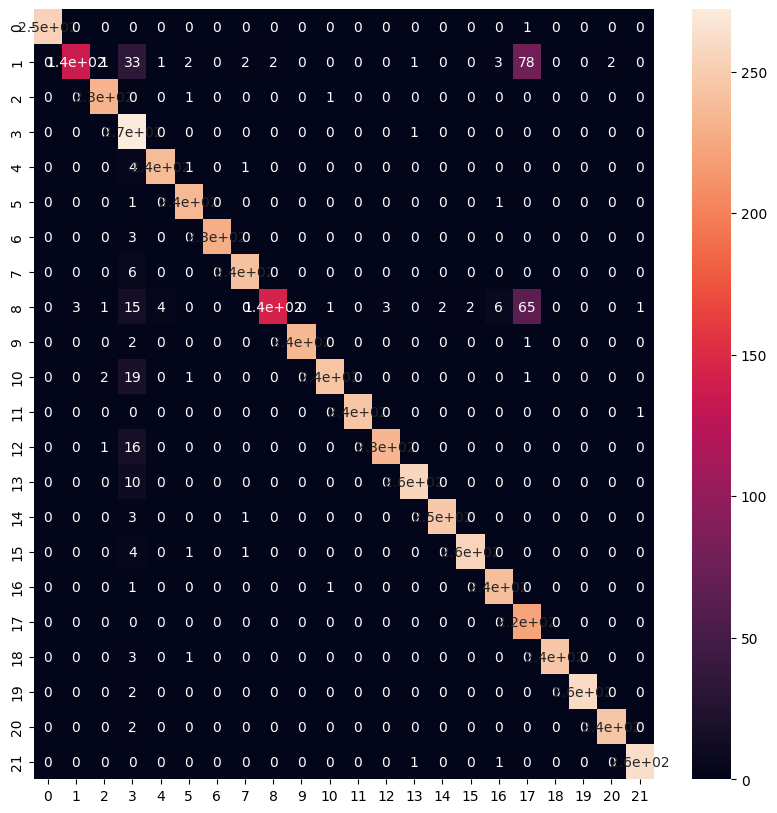

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(cf,annot=True)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9409090909090909

# UI for using ML model

In [26]:
def prediction(text):
    
    cleaned=remove_punc(text)
    ans=clf.predict([cleaned])
    return ans[0]
  

In [27]:
Y.value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [28]:
import gradio as gr
face=gr.Interface(fn=prediction,inputs="text",outputs="text")
face.launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
